In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import os
from tensorflow.keras.models import load_model

In [2]:
output = {0:'Akash',1:'Sonali'}
model_face = load_model('face_model.h5')
font = cv.FONT_HERSHEY_SIMPLEX 
face_cascade = cv.CascadeClassifier(r'C:\Users\HP\AI Projects\Computer_Vision\Computer-Vision-with-Python\DATA\haarcascades\haarcascade_frontalface_default.xml')

In [3]:
def detect_face(img):
    
    face_img = img.copy()
    face_rects = face_cascade.detectMultiScale(face_img,scaleFactor=2,minNeighbors=2) 
    for (x,y,w,h) in face_rects:
        new_img = face_img[y:y+h+50,x:x+w+50]
        str_ = recog_face(new_img)
        cv.putText(face_img, str_, (y+h,x), font, 1, (255, 0, 0) , 2, cv.LINE_AA)
        
    return face_img

In [4]:
def recog_face(img_):
    img_g = cv.resize(img_,(100,100))
    img_n = np.resize(img_g,(1,100,100,1))
    res = model_face.predict_classes(img_n)
    return str(output[int(res[0])])

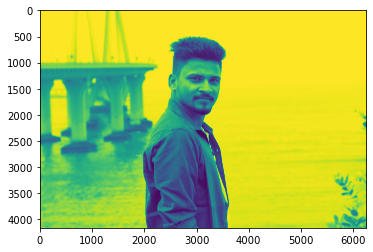

In [13]:
img_ = cv.imread('IMG_0342.jpg',cv.IMREAD_GRAYSCALE)
img_n = detect_face(img_)
plt.imshow(img_n)


In [14]:
cap = cv.VideoCapture(0) 
while True: 
    
    ret, frame = cap.read(0) 
     
    frame = detect_face(frame)
 
    cv.imshow('Video Face Detection', frame) 
 
    c = cv.waitKey(1) 
    if c == 27: 
        break 
        
cap.release() 
cv.destroyAllWindows()